In [152]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [153]:
train_set = pd.read_excel('recruiting_zeta-disease_training-data_take-home-challenge.xlsx')
test_set = pd.read_excel('recruiting_zeta-disease_prediction-data_take-home-challenge.xlsx')

In [154]:
train_set.shape, test_set.shape

((800, 9), (20, 9))

In [155]:
train_set.describe()

,age,weight,bmi,blood_pressure,insulin_test,liver_stress_test,cardio_stress_test,years_smoking,zeta_disease
count,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000
mean,30.985000,172.407500,32.201625,69.565000,85.887500,0.544496,43.121250,4.051250,0.348750
std,13.824025,31.942438,8.549155,19.874784,126.333656,0.348711,30.409949,4.176173,0.476873
min,18.000000,94.000000,0.000000,0.000000,0.000000,0.140800,0.000000,0.000000,0.000000
25%,21.000000,149.000000,27.300000,62.000000,0.000000,0.307800,0.000000,1.000000,0.000000
50%,26.000000,167.000000,32.050000,72.000000,45.000000,0.445300,53.000000,3.000000,0.000000
75%,38.000000,192.000000,36.525000,80.000000,130.000000,0.699800,62.000000,6.000000,1.000000
max,109.000000,308.000000,86.100000,157.000000,1077.000000,3.481300,214.000000,40.000000,1.000000


columns with zeros that should more than likely have a "truer": bmi, blood_pressure, insulin_test, cardio

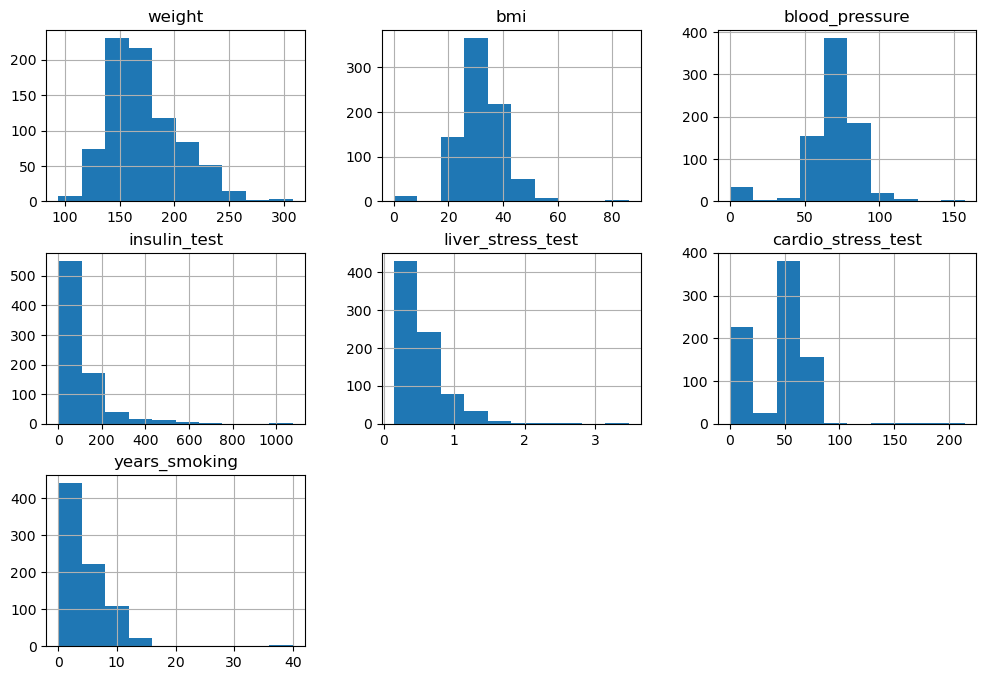

In [156]:
train_set[train_set.columns[1:-1]].hist(bins=10, figsize=(12, 8))
plt.show()

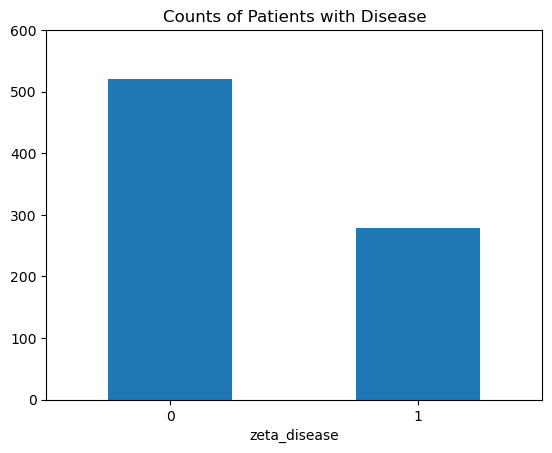

In [157]:
train_set.zeta_disease.value_counts().plot(
    kind='bar',
    rot=0,
    title='Counts of Patients with Disease'
)
plt.ylim(0, 600)
plt.show()

Data Cleaning/Imputing

In [158]:
test_set.describe()

,age,weight,bmi,blood_pressure,insulin_test,liver_stress_test,cardio_stress_test,years_smoking,zeta_disease
count,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,0.0
mean,34.750000,178.800000,34.480000,78.500000,145.050000,1.569600,61.950000,6.050000,NaN
std,11.511436,27.935264,6.628773,14.005638,75.964309,0.230356,9.703363,3.471311,NaN
min,19.000000,120.000000,25.800000,59.000000,50.000000,1.249800,43.000000,2.000000,NaN
25%,26.250000,153.250000,30.250000,69.750000,76.250000,1.411800,55.750000,3.000000,NaN
50%,34.500000,188.500000,33.150000,72.500000,137.000000,1.483300,60.000000,5.500000,NaN
75%,44.250000,197.750000,37.600000,89.250000,167.750000,1.737800,68.000000,7.500000,NaN
max,60.000000,216.000000,50.700000,108.000000,362.000000,2.050800,83.000000,13.000000,NaN


In [159]:
# test set doesn't contain any "missing" data
# will use age bins to start helping to impute values. 
# I"m assuming that some of the data is "age" and "weight" specifc initially 
# smoking is important as well, you could assume that it will affect things
# such as bmi, weight, and cardio test

age_bins = pd.cut(
    train_set.age,
    bins=[0, 18, 38, 58, 78, 98, np.inf],
    labels=[i for i in range(6)]
)
train_set['age_bin'] = age_bins

In [160]:
weight_bins = pd.cut(
    train_set.weight,
    bins=[10, 94, 144, 194, 244, 294, np.inf],
    labels=[i for i in range(6)]
)
train_set['weight_bins'] = weight_bins

In [161]:
train_set

,age,weight,bmi,blood_pressure,insulin_test,liver_stress_test,cardio_stress_test,years_smoking,zeta_disease,age_bin,weight_bins
0,54,189,27.1,80,0,1.5038,0,10,0,2,2
1,23,150,38.5,68,71,0.3868,55,2,0,1,2
2,47,186,29.9,90,0,0.2728,0,7,0,2,2
3,18,150,30.8,70,1033,0.6598,56,0,0,0,2
4,24,160,32.4,74,125,0.7608,59,2,0,1,2
...,...,...,...,...,...,...,...,...,...,...,...
795,26,161,28.4,90,78,0.5578,42,3,0,1,2
796,37,165,33.7,60,0,0.3078,69,6,1,1,2
797,27,166,25.6,74,0,0.2638,0,5,0,1,2
798,109,139,28.1,66,94,0.2298,53,1,0,5,1


In [162]:
train_copy = train_set.copy()
train_copy['bmi'] = train_copy['bmi'].replace(0, np.nan)
train_copy['bmi'] = train_copy.groupby(["age_bin", "weight_bins", "years_smoking"], observed=True)['bmi']\
    .transform(lambda x: x.fillna(x.median()))
train_copy.isna().sum()

age                   0
weight                0
bmi                   0
blood_pressure        0
insulin_test          0
liver_stress_test     0
cardio_stress_test    0
years_smoking         0
zeta_disease          0
age_bin               0
weight_bins           0
dtype: int64

In [163]:
train_copy['weight_kg'] = train_copy['weight'] / 2.205
train_copy['height'] = np.sqrt(train_copy['weight_kg'] / train_copy['bmi']) * 3.281
train_copy.head(10)

,age,weight,bmi,blood_pressure,insulin_test,liver_stress_test,cardio_stress_test,years_smoking,zeta_disease,age_bin,weight_bins,weight_kg,height
0,54,189,27.1,80,0,1.5038,0,10,0,2,2,85.714286,5.835098
1,23,150,38.5,68,71,0.3868,55,2,0,1,2,68.027211,4.361312
2,47,186,29.9,90,0,0.2728,0,7,0,2,2,84.353741,5.510904
3,18,150,30.8,70,1033,0.6598,56,0,0,0,2,68.027211,4.876096
4,24,160,32.4,74,125,0.7608,59,2,0,1,2,72.562358,4.910090
5,49,158,27.0,80,0,0.3218,0,2,1,2,2,71.655329,5.345011
6,20,154,27.8,64,116,0.5168,53,0,0,1,2,69.841270,5.200438
7,37,167,34.5,88,145,0.4658,54,1,1,1,2,75.736961,4.861280
8,21,162,34.8,80,132,0.2798,75,1,0,1,2,73.469388,4.767271
9,19,186,31.2,70,0,1.2448,0,4,1,1,2,84.353741,5.394872


In [164]:
bmi_bins = pd.cut(
    train_copy.bmi,
    bins=[0, 18, 33, 48, 63, 78, np.inf],
    labels=[i for i in range(6)]
)
train_copy['bmi_bin'] = bmi_bins
train_copy

,age,weight,bmi,blood_pressure,insulin_test,liver_stress_test,cardio_stress_test,years_smoking,zeta_disease,age_bin,weight_bins,weight_kg,height,bmi_bin
0,54,189,27.1,80,0,1.5038,0,10,0,2,2,85.714286,5.835098,1
1,23,150,38.5,68,71,0.3868,55,2,0,1,2,68.027211,4.361312,2
2,47,186,29.9,90,0,0.2728,0,7,0,2,2,84.353741,5.510904,1
3,18,150,30.8,70,1033,0.6598,56,0,0,0,2,68.027211,4.876096,1
4,24,160,32.4,74,125,0.7608,59,2,0,1,2,72.562358,4.910090,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,26,161,28.4,90,78,0.5578,42,3,0,1,2,73.015873,5.260847,1
796,37,165,33.7,60,0,0.3078,69,6,1,1,2,74.829932,4.889100,2
797,27,166,25.6,74,0,0.2638,0,5,0,1,2,75.283447,5.626470,1
798,109,139,28.1,66,94,0.2298,53,1,0,5,1,63.038549,4.914238,1


In [165]:
train_copy['blood_pressure'] = train_copy['blood_pressure'].replace(0, np.nan)
train_copy['blood_pressure'] = train_copy.groupby(
    ["age_bin", "weight_bins"],
    observed=False
)['blood_pressure'].transform(lambda x: x.fillna(x.median()))

train_copy.isna().sum()

age                   0
weight                0
bmi                   0
blood_pressure        0
insulin_test          0
liver_stress_test     0
cardio_stress_test    0
years_smoking         0
zeta_disease          0
age_bin               0
weight_bins           0
weight_kg             0
height                0
bmi_bin               0
dtype: int64

In [166]:
train_copy['insulin_test'] = train_copy['insulin_test'].replace(0, np.nan)
train_copy['insulin_test'] = train_copy.groupby(["age_bin"], observed=True)['insulin_test']\
    .transform(lambda x: x.fillna(x.median()))
train_copy.isna().sum()

age                   0
weight                0
bmi                   0
blood_pressure        0
insulin_test          0
liver_stress_test     0
cardio_stress_test    0
years_smoking         0
zeta_disease          0
age_bin               0
weight_bins           0
weight_kg             0
height                0
bmi_bin               0
dtype: int64

In [167]:
train_copy['cardio_stress_test'] = train_copy['cardio_stress_test'].replace(0, np.nan)
train_copy['cardio_stress_test'] = train_copy.groupby(
    ["age_bin"],
    observed=True
)['cardio_stress_test'].transform(lambda x: x.fillna(x.median()))
train_copy.isna().sum()

age                   0
weight                0
bmi                   0
blood_pressure        0
insulin_test          0
liver_stress_test     0
cardio_stress_test    0
years_smoking         0
zeta_disease          0
age_bin               0
weight_bins           0
weight_kg             0
height                0
bmi_bin               0
dtype: int64

In [168]:
# I will be leaving years smoking alone because its possible for someone
# to not be a smoker, despite the test set containing all smokers

# model building
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier

In [169]:
columns = [
    'age', 'bmi', 'blood_pressure', 'insulin_test', 'liver_stress_test',
    'cardio_stress_test', 'years_smoking','height'
]
X = train_copy[columns]
y = train_copy.zeta_disease
X_train, X_val, y_train, y_val = train_test_split(
    X, y, shuffle=True, stratify=y, test_size=0.2, random_state=1
)

cv = KFold(n_splits=10)

In [170]:
rfc = RandomForestClassifier(n_estimators=100)
rfc_cv = cross_val_score(
    rfc, X_train, y_train, cv=cv, scoring='roc_auc'
)
print(f'Random Forest {rfc_cv.mean():0.4f}')

Random Forest 0.8188


In [171]:
columns = [
    'age', 'bmi', 'weight', 'height', 'blood_pressure', 'insulin_test', 'liver_stress_test',
    'cardio_stress_test', 'years_smoking'
]
X = train_copy[columns]
y = train_copy.zeta_disease
X_train, X_val, y_train, y_val = train_test_split(
    X, y, shuffle=True, stratify=y, test_size=0.2, random_state=1
)

In [172]:
rfc = RandomForestClassifier(n_estimators=100)
rfc_cv = cross_val_score(
    rfc, X_train, y_train, cv=cv, scoring='roc_auc'
)

print(f'Random Forest {rfc_cv.mean():0.4f}')

Random Forest 0.8416


In [173]:
# lets fit onto the training data and test against the validation
from sklearn.metrics import roc_auc_score, RocCurveDisplay

X = train_copy[columns]
y = train_copy.zeta_disease
X_train, X_val, y_train, y_val = train_test_split(
    X, y, shuffle=True, stratify=y, test_size=0.2, random_state=1
)

rfc = RandomForestClassifier(n_estimators=100)
fit_model = rfc.fit(X_train, y_train)

train_preds = fit_model.predict(X_train)
train_probs = fit_model.predict_proba(X_train)
valid_preds = fit_model.predict(X_val)
valid_probs = fit_model.predict_proba(X_val)

In [174]:
train_roc_auc = roc_auc_score(y_train, train_preds)
valid_roc_auc = roc_auc_score(y_val, valid_preds)
print(f'Train ROC AUC: {train_roc_auc:0.4f}')
print(f'Valid ROC AUC: {valid_roc_auc:0.4f}')

Train ROC AUC: 1.0000
Valid ROC AUC: 0.7630


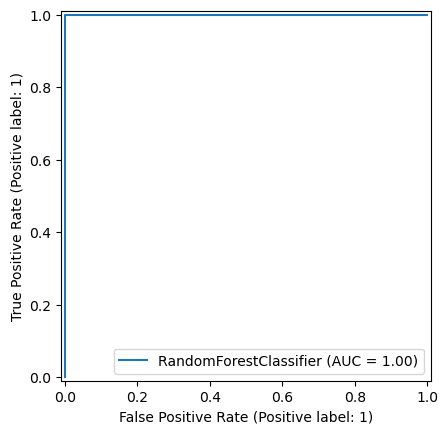

In [175]:
RocCurveDisplay.from_estimator(rfc, X_train, y_train)

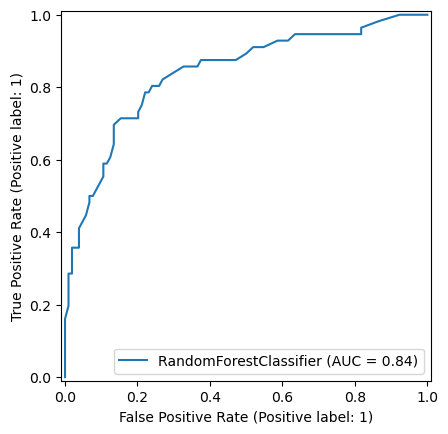

In [176]:
RocCurveDisplay.from_estimator(rfc, X_val, y_val)

In [177]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_train, train_preds)

array([[417,   0],
       [  0, 223]], dtype=int64)

In [178]:
tn, fp, fn, tp = confusion_matrix(y_val, valid_preds).ravel()
print(f'True Neg: {tn}')
print(f'False Pos: {fp}')
print(f'False Neg {fn}')
print(f'True Pos: {tp}')

True Neg: 90
False Pos: 14
False Neg 19
True Pos: 37


In [179]:
rfc = RandomForestClassifier(n_estimators=500)
fit_model = rfc.fit(X_train, y_train)

train_preds = fit_model.predict(X_train)
train_probs = fit_model.predict_proba(X_train)
valid_preds = fit_model.predict(X_val)
valid_probs = fit_model.predict_proba(X_val)

train_roc_auc = roc_auc_score(y_train, train_preds)
valid_roc_auc = roc_auc_score(y_val, valid_preds)
print(f'Train ROC AUC: {train_roc_auc:0.4f}')
print(f'Valid ROC AUC: {valid_roc_auc:0.4f}')

Train ROC AUC: 1.0000
Valid ROC AUC: 0.7500


In [180]:
tn, fp, fn, tp = confusion_matrix(y_val, valid_preds).ravel()
print(f'True Neg: {tn}')
print(f'False Pos: {fp}')
print(f'False Neg {fn}')
print(f'True Pos: {tp}')

True Neg: 91
False Pos: 13
False Neg 21
True Pos: 35


In [181]:
columns = [
    'age', 'weight', 'bmi', 'blood_pressure', 'insulin_test',
       'liver_stress_test', 'cardio_stress_test', 'years_smoking',
       'age_bin', 'weight_bins', 'height', 'bmi_bin'
]

X = train_copy[columns]
y = train_copy.zeta_disease
X_train, X_val, y_train, y_val = train_test_split(
    X, y, shuffle=True, stratify=y, test_size=0.2, random_state=1
)

rfc = RandomForestClassifier(n_estimators=100)
fit_model = rfc.fit(X_train, y_train)

train_preds = fit_model.predict(X_train)
valid_preds = fit_model.predict(X_val)

train_roc_auc = roc_auc_score(y_train, train_preds)
valid_roc_auc = roc_auc_score(y_val, valid_preds)
print(f'Train ROC AUC: {train_roc_auc:0.4f}')
print(f'Valid ROC AUC: {valid_roc_auc:0.4f}')

Train ROC AUC: 1.0000
Valid ROC AUC: 0.7411


In [187]:
columns = [
    'age', 'bmi', 'weight', 'height', 'blood_pressure', 'insulin_test', 'liver_stress_test',
    'cardio_stress_test', 'years_smoking'
]

X = train_copy[columns]
y = train_copy.zeta_disease
X_train, X_val, y_train, y_val = train_test_split(
    X, y, shuffle=True, stratify=y, test_size=0.2, random_state=1
)

In [191]:
from sklearn.model_selection import RandomizedSearchCV

param_distributions = {
    'n_estimators': np.arange(100, 500, 100),
    'max_depth': np.arange(1, 11, 2),
    'min_samples_split': np.arange(2, 9, 2),
    'min_samples_leaf': np.arange(1, 5, 2),
}
rf = RandomForestClassifier()

random_search = RandomizedSearchCV(rf, param_distributions, n_iter=50, cv=5, random_state=42)
random_search.fit(X_train, y_train)

best_params = random_search.best_params_

rf_best = RandomForestClassifier(**best_params)
rf_best.fit(X_train, y_train)

# Evaluate the model on the test set
y_pred = rf_best.predict(X_val)
valid_rocauc = roc_auc_score(y_val, y_pred)
print(f"Validation ROC AUC: {valid_rocauc}")

Validation ROC AUC: 0.7726648351648351


In [192]:
test_set['weight_kg'] = test_set['weight'] / 2.205
test_set['height'] = np.sqrt(test_set['weight_kg'] / test_set['bmi']) * 3.281
test_predictions = rf_best.predict(test_set[columns])
test_predictions

array([0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1],
      dtype=int64)

In [193]:
test_set.zeta_disease = test_predictions
test_set

,age,weight,bmi,blood_pressure,insulin_test,liver_stress_test,cardio_stress_test,years_smoking,zeta_disease,weight_kg,height
0,24,151,39.5,69,72,1.3968,56,4,0,68.480726,4.320081
1,27,179,35.5,89,156,1.6608,43,6,1,81.179138,4.961515
2,34,147,26.9,76,74,1.6958,53,2,0,66.666667,5.165168
3,35,206,32.4,73,127,1.4608,61,6,1,93.424036,5.571383
4,60,193,29.8,62,192,1.7798,65,9,1,87.528345,5.623057
5,45,120,36.5,108,50,1.2978,54,12,0,54.421769,4.006325
6,20,139,38.2,61,77,1.5818,68,3,0,63.038549,4.214807
7,23,137,31.2,70,73,1.4168,59,7,0,62.131519,4.630042
8,36,195,30.5,59,141,1.4498,59,6,1,88.435374,5.586880
9,19,193,25.8,84,66,1.7938,50,3,0,87.528345,6.043252


In [195]:
result = test_set.drop(columns=['weight_kg', 'height'])
result.to_excel('recruiting_zeta-disease_prediction-data_take-home-challenge.xlsx', index=False)